In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from plotnine import *


tips = sns.load_dataset("tips")
#tips.to_csv('tips.csv', index=False, header=True)
tips


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


## (a) 多数据系列的箱型图

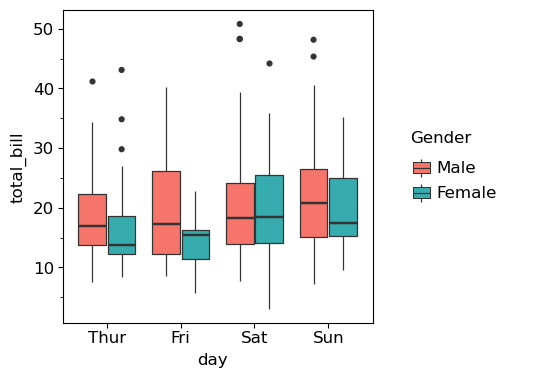

<ggplot: (173280707497)>


In [2]:
box2_plot = (ggplot(tips, aes(x="day", y="total_bill"))
             + geom_boxplot(aes(fill="sex"),
                            position=position_dodge(0.8), size=0.5)
             + guides(fill=guide_legend(title="Gender"))
             + scale_fill_hue(s=0.90, l=0.65, h=0.0417, color_space='husl')
             + theme_matplotlib()
             + theme(legend_position='right',
                     text=element_text(size=12, colour="black"),
                     aspect_ratio=1.01,
                     dpi=100,
                     figure_size=(4, 4)))
print(box2_plot)
# box2_plot.save("box2_plot.pdf")


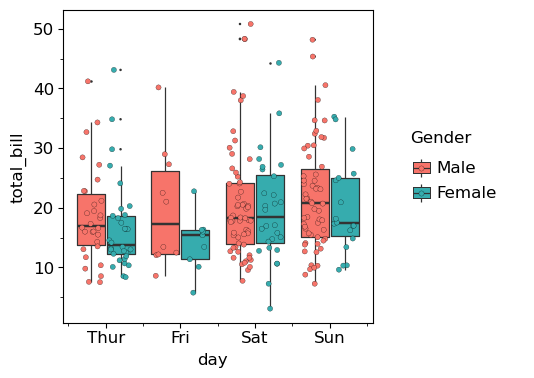

<ggplot: (173281257732)>


In [3]:
# ------------------------------------(b) 带抖动散点的多数据系列箱型图.----------------------
x_label = ['Thur', 'Fri', 'Sat', 'Sun']
tips['x1'] = pd.factorize(tips['day'], sort=x_label)[0]+1
tips['x2'] = tips.apply(lambda x: x['x1']-0.2 if x['sex']
                        == "Male" else x['x1']+0.2, axis=1)

box2_plot = (ggplot(tips, aes(x="x1", y="total_bill", group="x2", fill="sex"))
             + geom_boxplot(position=position_dodge(0.8),
                            size=0.5, outlier_size=0.001)
             + geom_jitter(aes(x="x2"), position=position_jitter(width=0.15),
                           shape="o", size=2, stroke=0.1)
             + guides(fill=guide_legend(title="Gender"))
             + scale_fill_hue(s=0.90, l=0.65, h=0.0417, color_space='husl')
             + scale_x_continuous(breaks=range(1, len(x_label)+1),
                                  labels=x_label, name='day')
             + xlab("day")
             + theme_matplotlib()
             + theme(legend_position='right',
                     text=element_text(size=12, colour="black"),
                     aspect_ratio=1.01,
                     dpi=100,
                     figure_size=(4, 4)))
print(box2_plot)
# box2_plot.save("box2_plot2.pdf")


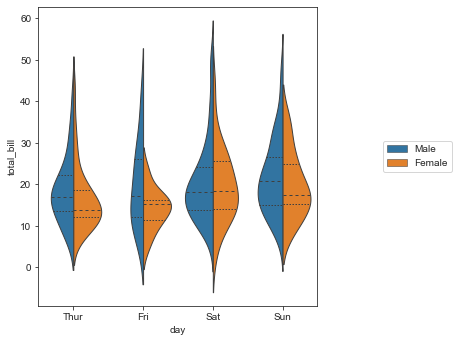

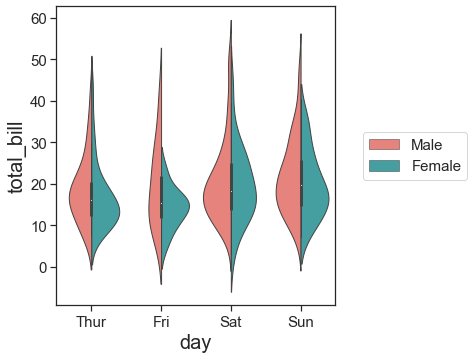

In [4]:
# ---------------------------------- (c) 带抖动散点的多数据系列小提琴图-----------------------------
sns.set_style("ticks")

fig = plt.figure(figsize=(5, 5.5))
violinplot = sns.violinplot(x="day", y="total_bill", hue="sex",
                            data=tips, inner="quartile", split=True,
                            linewidth=1, colors=["#F7746A", "#36ACAE"])
# violinplot.despine(left=True)
plt.legend(loc="center right",
           bbox_to_anchor=(1.5, 0, 0, 1))
#violinplot.set_axis_labels("day", "total bill")
# inner：控制violinplot内部数据点的表示，
# 有“box”, “quartile”, “point”, “stick”四种方式。
# fig.savefig('violinplot_split2.pdf')

# ----------------------------------(d) 多数据系列的豆状图-----------------------------
# flatui = ["#F7746A", "#36ACAE", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
#sns.set_palette(sns.hls_palette(2, s = 0.95, l = 0.5, h=0.0417))
sns.set_context("notebook", font_scale=1.5,
                rc={'font.size': 12, 'axes.labelsize': 20, 'legend.fontsize': 15,
                    'xtick.labelsize': 15, 'ytick.labelsize': 15})

fig = plt.figure(figsize=(5, 5.5))
violinplot = sns.violinplot(x="day", y="total_bill", hue="sex",
                            data=tips, inner="box", split=True,
                            linewidth=1, palette=["#F7746A", "#36ACAE"])
plt.legend(loc="center right",
           bbox_to_anchor=(1.5, 0, 0, 1))

# plt.savefig('violinplot_split.pdf')
